# Unsupervised Learning Challenge
#### Glen Dagger

In [231]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

### Part 1: Prepare the Data

In [232]:
# Read in myopia dataset
df = pd.read_csv("./Resources/myopia.csv")

# Preview dataframe
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [233]:
# Remove "MYOPIC" column from dataframe
features = df.drop("MYOPIC", axis=1)

# Preview dataframe
features.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [234]:
# Standardize dataset 
X = StandardScaler().fit_transform(features)

# Show number of data points and features (14 features)
print("Scaled dataframe shape:", X.shape)

Scaled dataframe shape: (618, 14)


### Part 2: Apply Dimensionality Reduction

In [235]:
# Initialize PCA model to preserve 90% of explained variance (10 components)
pca = PCA(n_components=0.9)

# Get principal components for the standardized myopia data
myopia_pca = pca.fit_transform(X)

In [236]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=myopia_pca
)

# Show shape of dataframe (reduced to 10 features)
print("PCA Data Shape", df_myopia_pca.shape)

PCA Data Shape (618, 10)


In [237]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=150)

# Reduce dimensions
tsne_features = tsne.fit_transform(df_myopia_pca)

# Check for reduced number of features (2 columns)
print("TSNE Data Shape", tsne_features.shape)

/Users/glena.dagger/Downloads/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


TSNE Data Shape (618, 2)


In [238]:
# Store first column of transformed features as 'x'
df_myopia_pca["x"] = tsne_features[:,0]

# Store second column of transformed features as 'y'
df_myopia_pca["y"] = tsne_features[:,1]

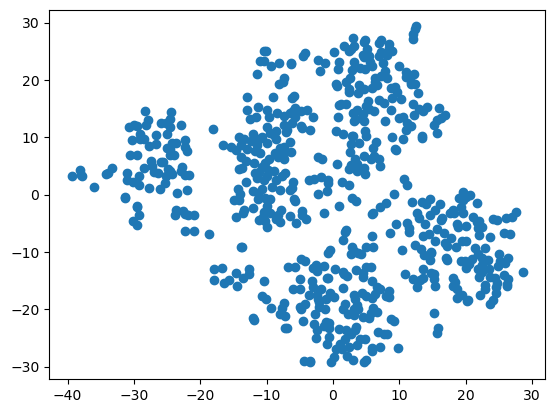

In [246]:
# Visualize the clusters in t-SNE output
plt.scatter(df_myopia_pca["x"], df_myopia_pca["y"])
plt.savefig('tsne_clusters.png')
plt.show()

Upon first glance, there appears to be roughly 5 clusters in the scatter plot, although they are not notably distinct.

### Part 3: Perform a Cluster Analysis with K-Means

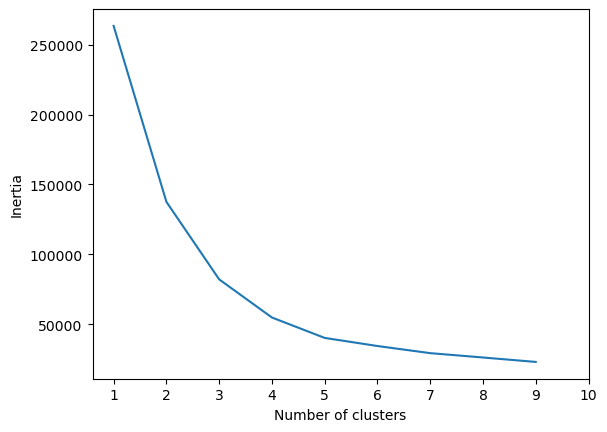

In [245]:
# Finding the best value for k
inertia = []
k = list(range(1,10))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(tsne_features)
    inertia.append(km.inertia_)

# Create the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}

# Define a DataFrame to plot the Elbow Curve using MatPlotLib
df_elbow = pd.DataFrame(elbow_data)

# Plot Elbow Curve
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.savefig('elbow_curve.png')
plt.show()

It appears that the elbow of the plot occurs at k=5.

In [241]:
# Initializing model with K = 5
model_km = KMeans(n_clusters=5, random_state=1)

# Fitting model
model_km.fit(tsne_features)

# Create dataframe of tSNE features
km_data = pd.DataFrame(tsne_features)

# Add the predicted class column to the dataframe
km_data["class"] = model_km.labels_

# Preview dataframe
km_data.head()


,0,1,class
0,-12.639556,-13.821846,3
1,-2.129715,-18.718660,3
2,-11.038607,7.324274,4
3,-12.109615,-21.567833,3
4,3.466736,13.142864,2


### Part 4: Make a Recommendation

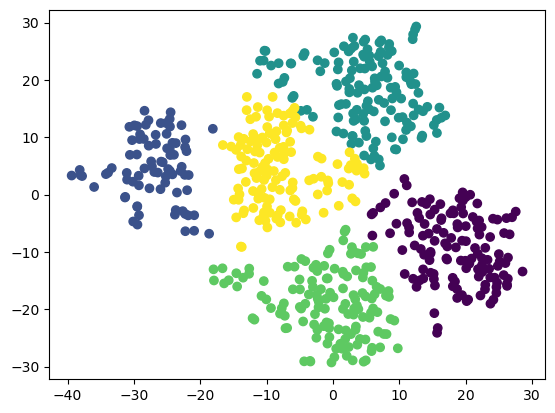

In [244]:
# Visualize the clusters
plt.scatter(km_data[0], km_data[1], c=km_data["class"])
plt.savefig("./final_clusters.png")
plt.show()

Based on the above analysis, it appears that the patients can indeed be clustered. The scatter plot shown directly above shows that after dimensionality reduction and K-clustering, there are five distinct and non-overlapping clusters. I recommend grouping the patients into 5 cluster.